# Exoplanet Light Curve

## Authors
B.W. Holwerda

## Learning Goals
* Analysis of exoplanet transient lightcurves
* Frequency and period
* Planetary systems signal

## Keywords


## Companion Content

not in Ryden & Peterson

not in Carroll & Ostlie

## Summary

As an example, we will download all available Kepler observations for a known multi-planet system, Kepler-69.
We will follow the steps of the example here: https://lightkurve.github.io/lightkurve/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html

But adding some analysis and questions regarding this system. 
<hr>

# Kepler-69

Kepler-69 (KIC 8692861) is a G-type main-sequence star similar to the Sun in the constellation Cygnus, located about 730 pc from Earth. On April 18, 2013 the discovery of two planets was announced. 

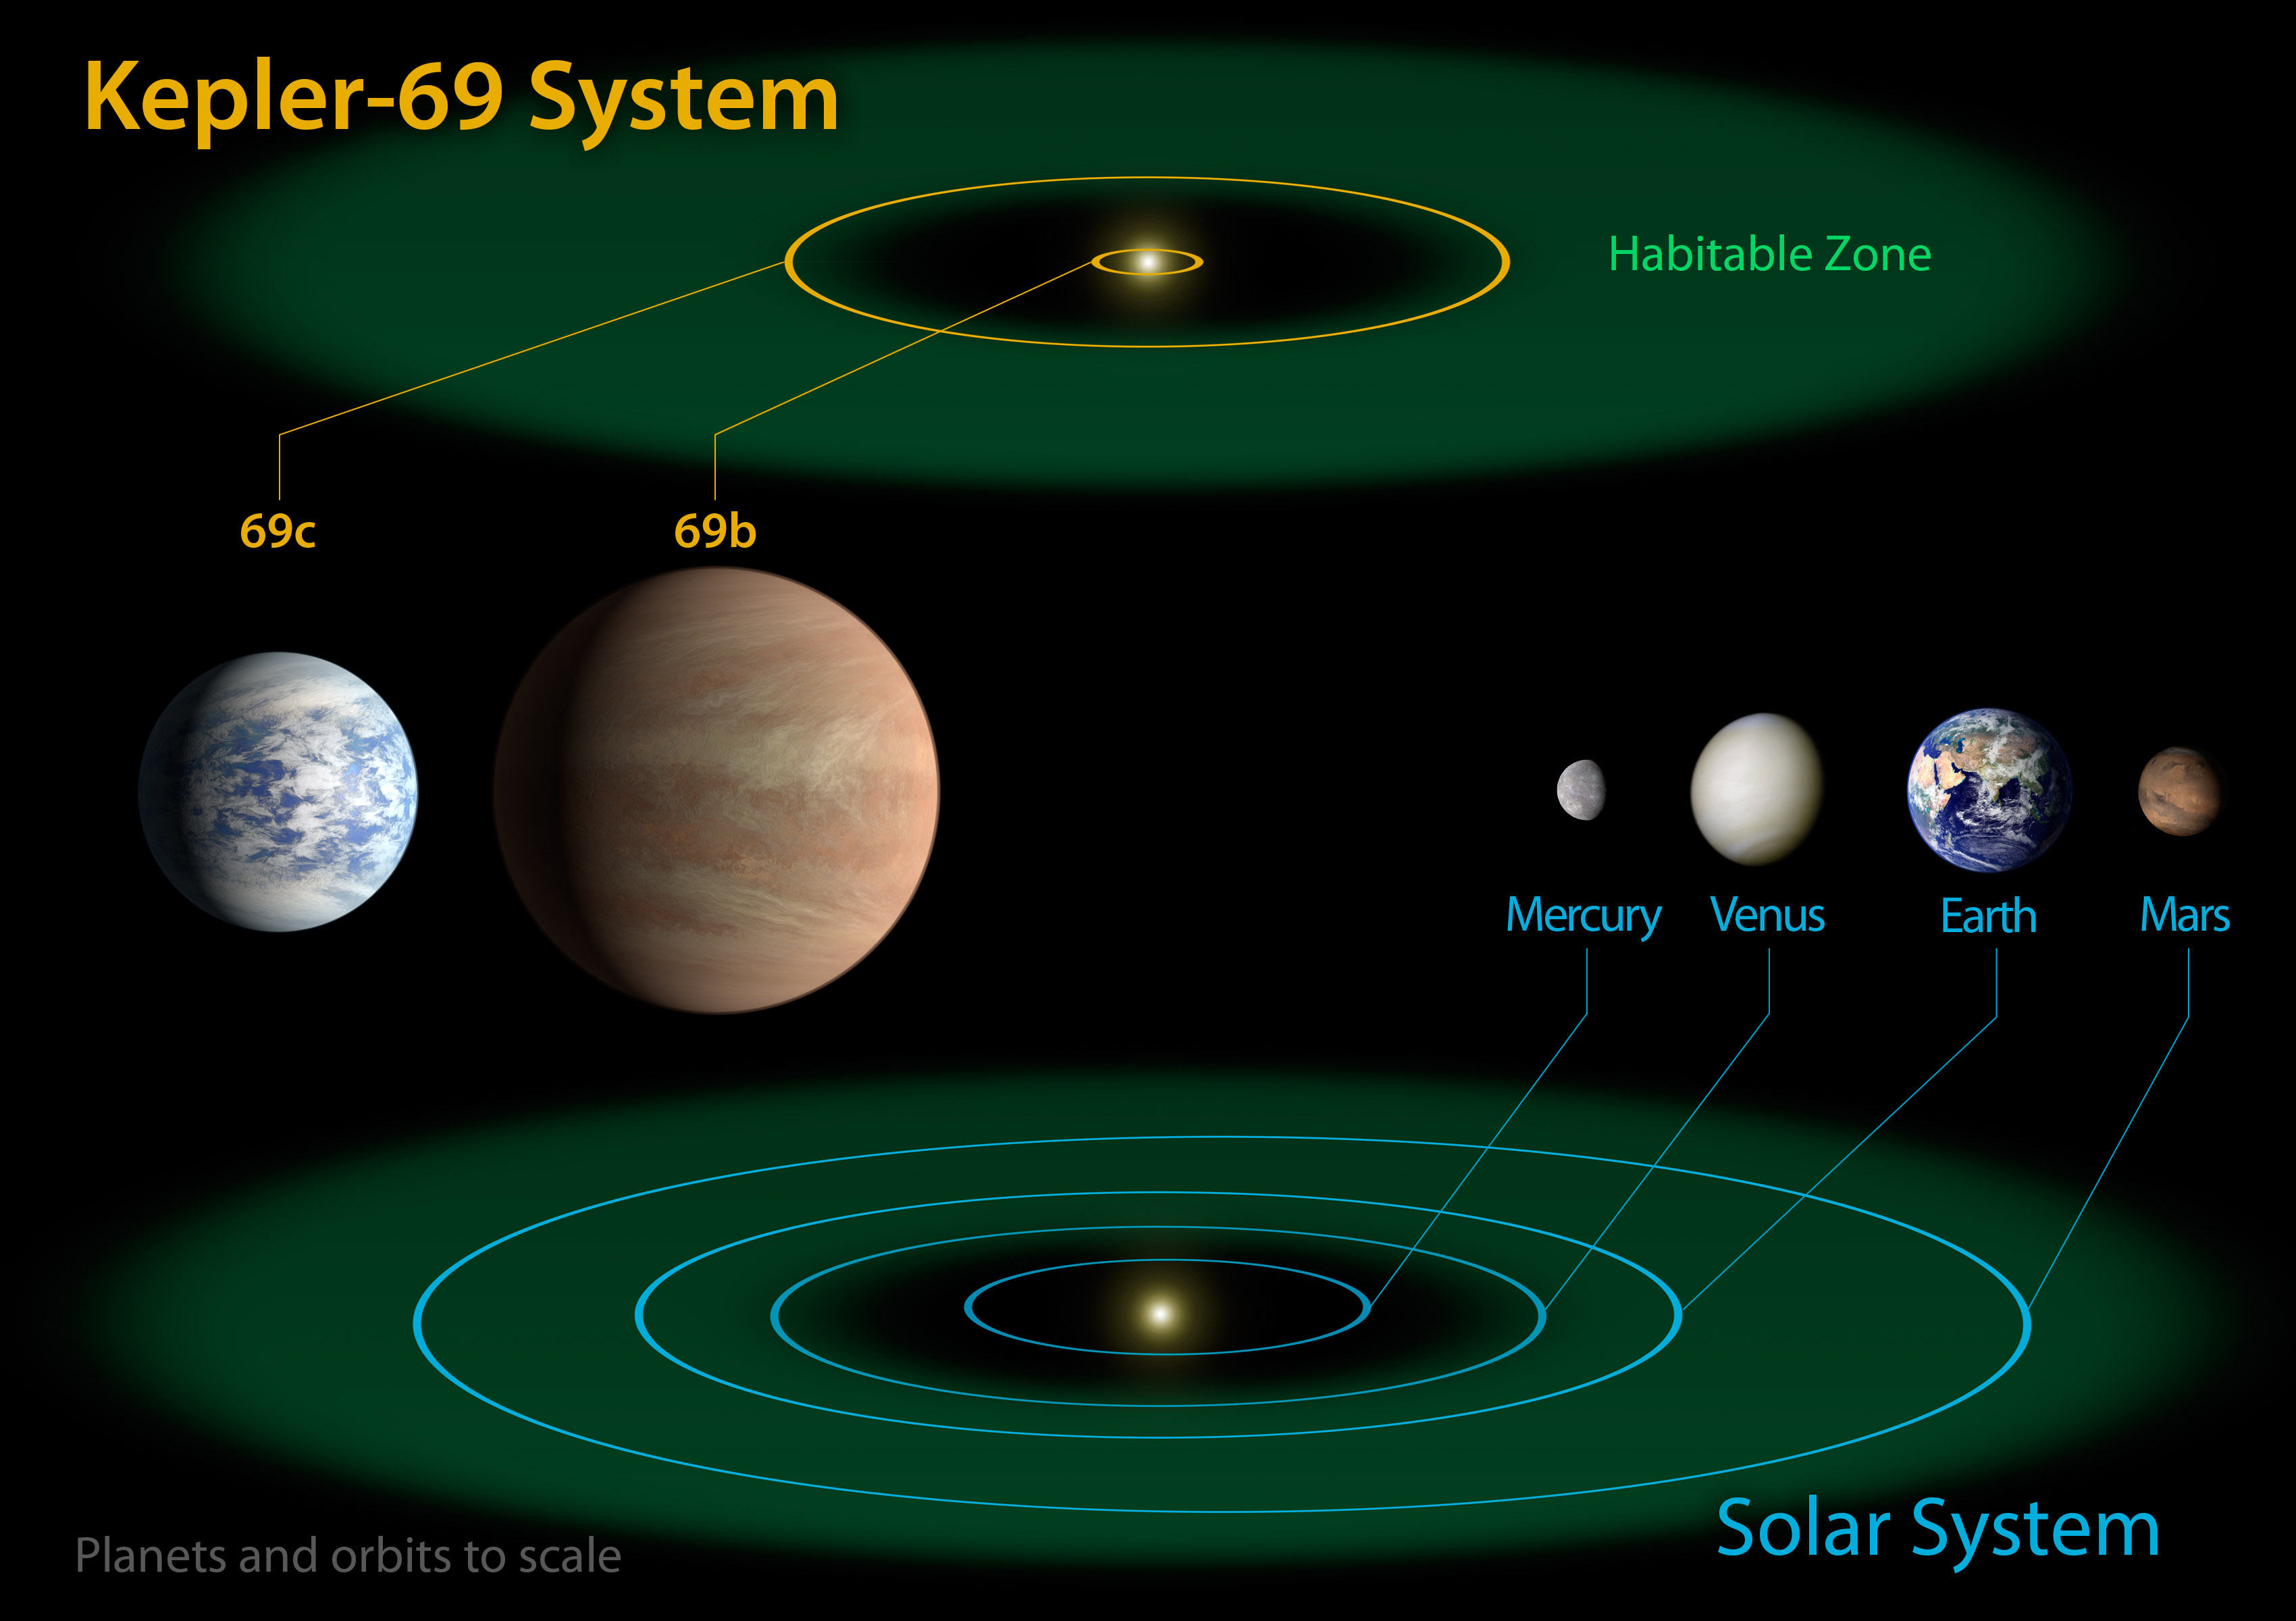

The Kepler mission found extrasolar planets using the *transit method*. 

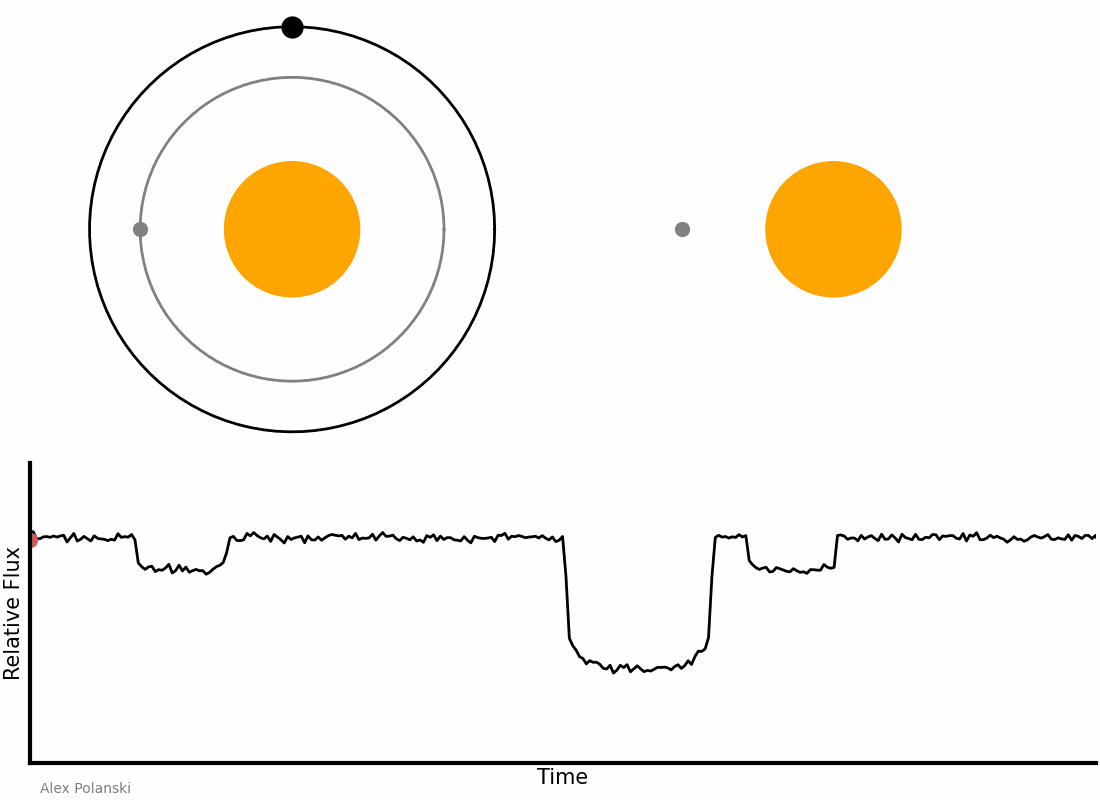

Figure from https://commons.wikimedia.org/wiki/File:Transit_method.gif

Here the planetary system is seen edge-on and the transit of each planet is observed as a miniscule diming of the parent star. These dips, and especially *repeating* dips are what identifies an exoplanet with this method. 

In [76]:
# importing the packages we will need# 
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15

# Searching for Kepler-69 Results in the MAST archive of NASA space missions.

We will use lightkurve for a lot of this analysis as it is made to retrieve ligthcurves for both the Kepler and TESS missions.

In [79]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-69', author='Kepler', cadence='long')


In [81]:
search_result

SearchResult containing 17 data products.

 #       mission      year author exptime  target_name  distance
                                     s                   arcsec 
--- ----------------- ---- ------ ------- ------------- --------
  0 Kepler Quarter 01 2009 Kepler    1800 kplr008692861      0.0
  1 Kepler Quarter 02 2009 Kepler    1800 kplr008692861      0.0
  2 Kepler Quarter 03 2009 Kepler    1800 kplr008692861      0.0
  3 Kepler Quarter 04 2010 Kepler    1800 kplr008692861      0.0
  4 Kepler Quarter 05 2010 Kepler    1800 kplr008692861      0.0
  5 Kepler Quarter 06 2010 Kepler    1800 kplr008692861      0.0
  6 Kepler Quarter 07 2010 Kepler    1800 kplr008692861      0.0
  7 Kepler Quarter 10 2011 Kepler    1800 kplr008692861      0.0
  8 Kepler Quarter 09 2011 Kepler    1800 kplr008692861      0.0
  9 Kepler Quarter 08 2011 Kepler    1800 kplr008692861      0.0
 10 Kepler Quarter 11 2012 Kepler    1800 kplr008692861      0.0
 11 Kepler Quarter 12 2012 Kepler    1800 kplr008692861      0.0
 12 Kepler Quarter 13 2012 Kepler    1800 kplr008692861      0.0
 13 Kepler Quarter 14 2012 Kepler    1800 kplr008692861      0.0
 14 Kepler Quarter 15 2013 Kepler    1800 kplr008692861      0.0
 15 Kepler Quarter 16 2013 Kepler    1800 kplr008692861      0.0
 16 Kepler Quarter 17 2013 Kepler    1800 kplr008692861      0.0

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

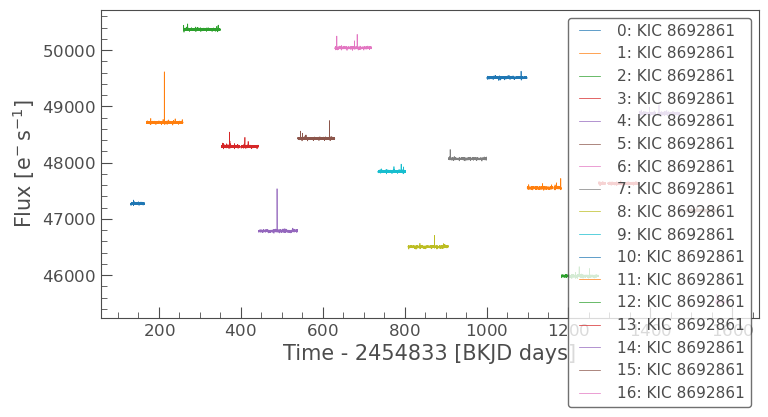

In [13]:
lc_collection = search_result.download_all()
lc_collection.plot()

### Assignment 1 - lightcurve combination

The lightcurves are not all at the same flux level. Can you think of a reason why each is different? 

*student written answer here*

## Normalization

Each observation has a different offset, so in order to successfully search this light curve for transits, we first need to normalize and flatten the full observation. This can be performed on a stitched light curve. The package lightkurve has several convenience functions to stitch all the lightcurves together, flatten (normalize) their fluxes, and remove the outliers.


In [83]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();


### Assignment 2 - lightcurve comparison

Compare the first collection of lightcuves and the second lightcurve. What is the same and what it different?

*student written answer here*

### Periodogram (Fourier Transform)

Lightkurve has two types of periodogram available to anaylze periodic trends in light curves: *LombScarglePeriodogram*  (‘lombscargle’ or ‘ls’) and *BoxLeastSquaresPeriodogram* (‘boxleastsquares’ or ‘bls’)

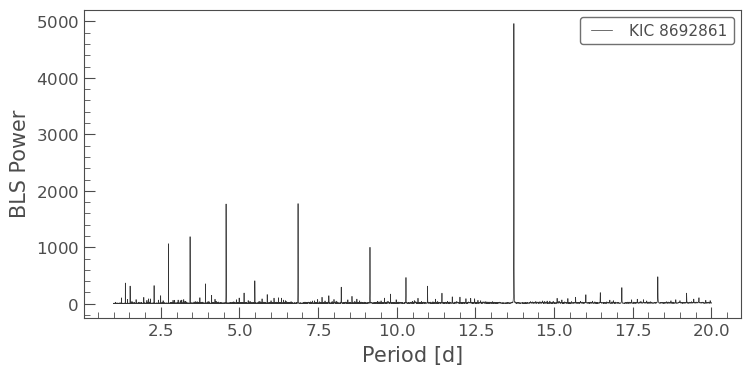

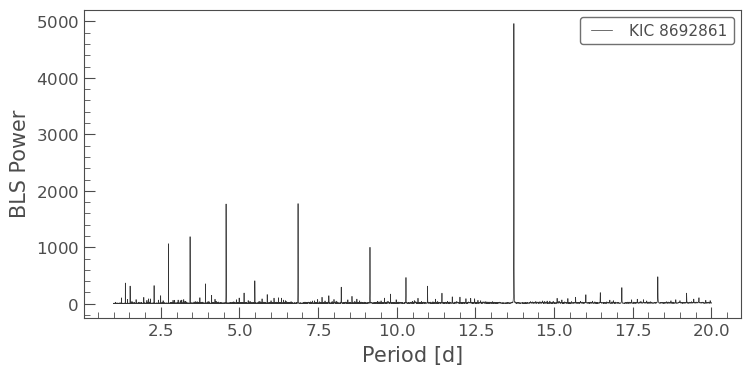

In [94]:
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()
plt.show()

### Assignment 3 - Periods

What is the range of periods under consideration? 

*student written answer here*

### Assignment 4 - Periods

What is the period corresponding to the highest peak (strongest signal in the power spectrum)?

*student written answer here*

In [2]:
# lets get the period, transit time, and duration
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period


NameError: name 'bls' is not defined

### Assignment 5 - Periods

How does the period printed above compare to your estimate above of the period with the strongest signal?

*student written answer here*

### Assignment 6 - Transit Duration

What is the transit duration? 

### Lightcurve Folding

A neat visual trick is to combine all the transits of this planet in the date into a single composition by folding the curve over by the inferred period.

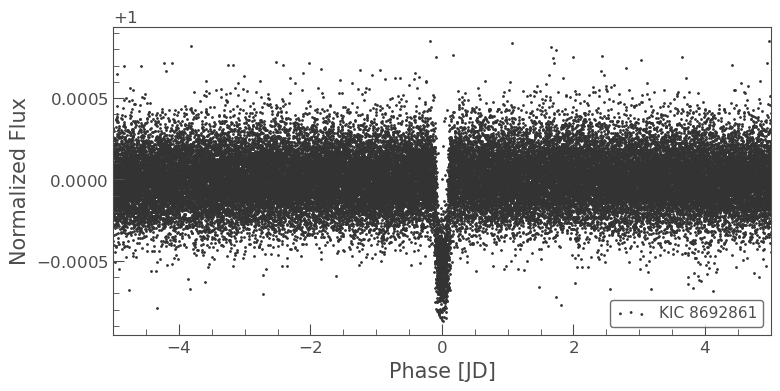

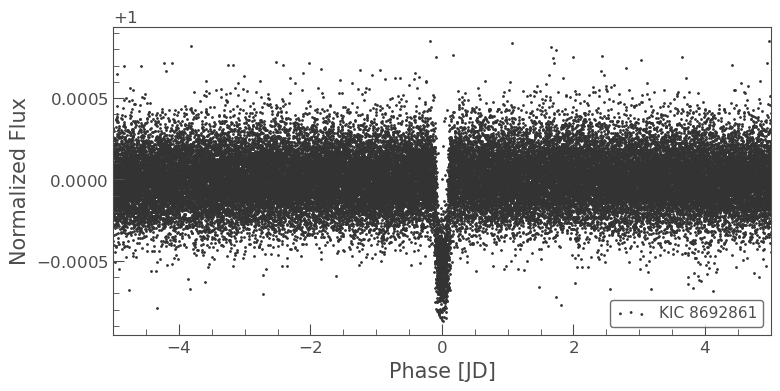

In [107]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);
plt.show()

### Cleaning Up

However, there is still a lot happening and some noise is clearly visible. Masking the signal, one can reduce the scatter by removing outliers that are not part of the transit. This is done below:

In [110]:
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

In [114]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter()
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked')


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

### Planet Transition model for the folded lightcurve

The transit model can now be plot on top of the folded lightcurve.

In [117]:
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

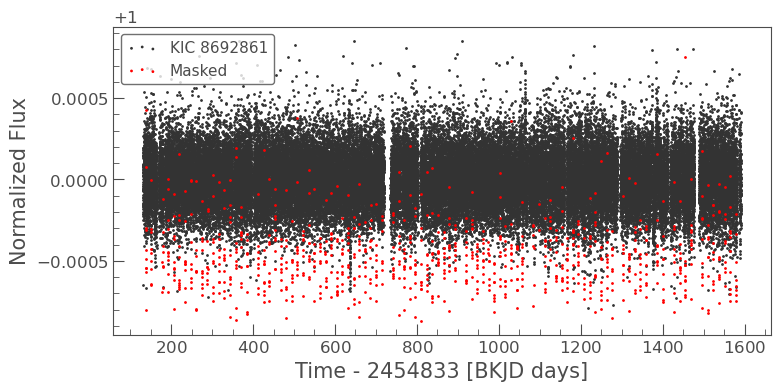

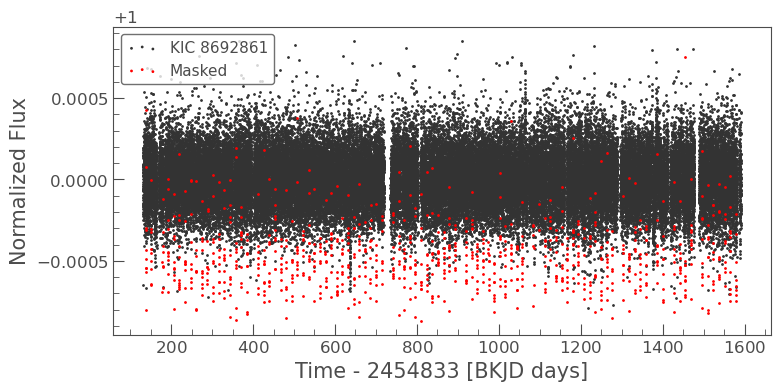

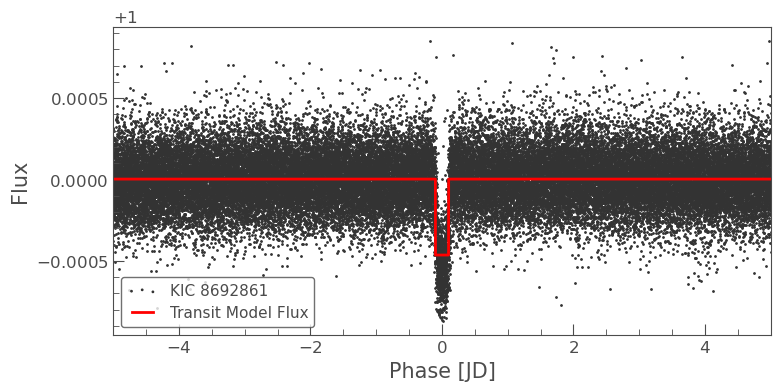

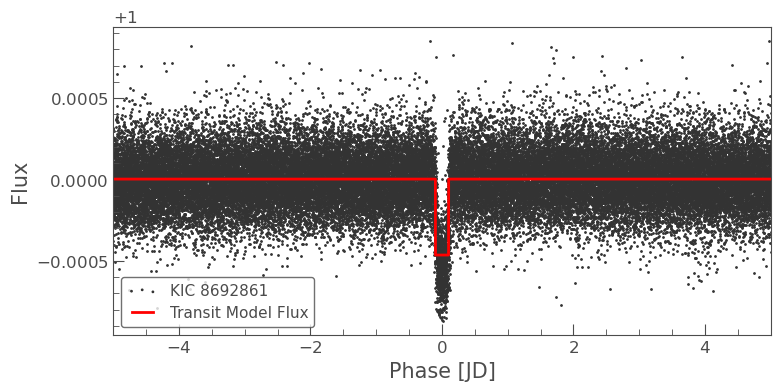

In [121]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5)
plt.show()

### Assignment 7 - Transit Type

For this model, did it assume a rocky planet or one with an extended diffuse atmosphere? Motivate your answer based on the above red model curve. 

*student written answer here*

### Assignment 8 - Ratio in Radii

Considering how much of the star Kepler-69 is covered by Kepler-69b planet during the transit, what is the relative ratios of their respective radii? 

*student answer below*


In [4]:
# student work here


### Assignment 9 - Ratio in Radii

taking your ratio from Assignment 8, and the fact that the Sun's radius is 6.957e+8 m. What is the radius of Kepler-69b? Is it bigger or smaller than the Earth?

*student written answer here*

In [7]:
# student code here


## There is another...

Kepler-69 is a planetary system and there is a second planet orbiting this star. Extending the periodogram but masking out the signal from the first planet, one can identify another peak.

In [62]:
period = np.linspace(1, 300, 10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot()

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

In [63]:
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power

# Check the value for period
planet_c_period

<Quantity 242.46664666 d>

In [64]:
ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
masked_lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          label='Binned Flux')
ax.set_xlim(-5, 5)

(-5.0, 5.0)

### Assignment 10 - Kepler-69b and c

Compare this second planet to the one in the previous assignments. Using the periods and Kepler's third law, what are the distances in AU for both planets? 



In [66]:
# student work here

a_pb = (planet_b_period/365)**(2./3.)

a_pc = (planet_c_period/365).value**(2./3.)

print(a_pb, a_pc)

0.11222205744526655 d(2/3) 0.7613296805256637


# Showing both planets transitions

Making a model for the second planet, we examine where each transitions in all the Kepler Spacecraft data.


In [70]:
planet_c_model = bls.get_transit_model(period=planet_c_period,
                                       transit_time=planet_c_t0,
                                       duration=planet_c_dur)

In [71]:
ax = lc.scatter();
planet_b_model.plot(ax=ax, c='dodgerblue', label='Planet b Transit Model')
planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model')

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux'>

# Interactive Mode

Lightcurve has an interactive mode. You will have noticed the many other peaks in the power spectrum. Are those also planets? Or are they resonances of the two existing planets? You can check this by taking 2x or half of the period and see if one of those peaks correspond to that.


In [181]:
lc.interact_bls()